1. Scraped Lionel Messi's injury data from Transfermarkt. 
2. Transformed two columns' data types from the object type to the integer type. 
3. Uploaded the transformed data into a locally hosted PostgreSQL database.
4. Further transformed and manipulated the data for the purposes of data analysis and visualization.

In [1]:
import requests as r
from bs4 import BeautifulSoup as soup
import pandas as pd

In [2]:
injury_data = []
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
for page_number in range (1,4):
    url = f"https://www.transfermarkt.com/lionel-messi/verletzungen/spieler/28003/ajax/yw1/sort/saison_id.desc/page/{page_number}"
    print(url)
    pageTree = r.get(url, headers=headers)
    pageSoup = soup(pageTree.content, 'html.parser')
    #injury_data = pageSoup.find_all("tr", {'class': 'odd'})
    header_1 = pageSoup.find_all("th", {'id': 'yw1_c0'})
    header_2 = pageSoup.find_all("th", {"id": "yw1_c1"})
    header_3 = pageSoup.find_all("th", {'id': 'yw1_c2'})
    header_4 = pageSoup.find_all("th", {'id': 'yw1_c3'})
    header_5 = pageSoup.find_all("th", {'id': 'yw1_c4'})
    header_6 = pageSoup.find_all("th", {'id': 'yw1_c5'})

    full_injury_data = header_1 + header_2 + header_3 + header_4 + header_5 + header_6 + injury_data
    
    
    injury_data_odd_row = pageSoup.find_all("tr", {'class': 'odd'})
    injury_data_even_row = pageSoup.find_all("tr", {'class': 'even'})

    for row in injury_data_odd_row + injury_data_even_row:
        season = row.find("td", {'class': 'zentriert'}).text.strip()
        injury = row.find("td", {'class': 'hauptlink'}).text.strip()
        start_date = row.find_all("td")[2].text.strip()
        end_date = row.find_all("td")[3].text.strip()
        duration = row.find_all("td")[4].text.strip()
        games_missed = row.find_all("td")[5].text.strip()

        print("season:", season)
        print("injury:", injury)
        print("start_date:", start_date)
        print("end_date:", end_date)
        print("duration:", duration)
        print("games_missed:", games_missed)
        print()
        
        injury_data.append({
            'season': season,
            'injury': injury,
            'start_date': start_date,
            'end_date': end_date,
            'duration_in_days': duration,
            'games_missed': games_missed,
        })

df = pd.DataFrame(injury_data)
df.to_csv('injury_data.csv', index=False)
display(df)

https://www.transfermarkt.com/lionel-messi/verletzungen/spieler/28003/ajax/yw1/sort/saison_id.desc/page/1
season: 22/23
injury: Calf Problems
start_date: Oct 5, 2022
end_date: Oct 13, 2022
duration: 8 days
games_missed: 3

season: 22/23
injury: Rest
start_date: Dec 26, 2022
end_date: Jan 3, 2023
duration: 8 days
games_missed: 2

season: 21/22
injury: Fitness
start_date: Aug 1, 2021
end_date: Aug 26, 2021
duration: 25 days
games_missed: 4

season: 21/22
injury: Knee Problems
start_date: Oct 29, 2021
end_date: Nov 11, 2021
duration: 13 days
games_missed: 3

season: 21/22
injury: Quarantine
start_date: Jan 6, 2022
end_date: Jan 20, 2022
duration: 14 days
games_missed: 2

season: 21/22
injury: Flu
start_date: Mar 17, 2022
end_date: Mar 24, 2022
duration: 7 days
games_missed: 1

season: 20/21
injury: Hamstring Injury
start_date: Jan 12, 2021
end_date: Jan 15, 2021
duration: 3 days
games_missed: 1

season: 19/20
injury: Adductor problems
start_date: Sep 25, 2019
end_date: Oct 1, 2019
duratio

,season,injury,start_date,end_date,duration_in_days,games_missed
0,22/23,Calf Problems,"Oct 5, 2022","Oct 13, 2022",8 days,3
1,22/23,Rest,"Dec 26, 2022","Jan 3, 2023",8 days,2
2,21/22,Fitness,"Aug 1, 2021","Aug 26, 2021",25 days,4
3,21/22,Knee Problems,"Oct 29, 2021","Nov 11, 2021",13 days,3
4,21/22,Quarantine,"Jan 6, 2022","Jan 20, 2022",14 days,2
5,21/22,Flu,"Mar 17, 2022","Mar 24, 2022",7 days,1
6,20/21,Hamstring Injury,"Jan 12, 2021","Jan 15, 2021",3 days,1
7,19/20,Adductor problems,"Sep 25, 2019","Oct 1, 2019",6 days,1
8,22/23,Achilles tendon problems,"Nov 5, 2022","Nov 7, 2022",2 days,1
9,22/23,Knee Problems,"Feb 8, 2023","Feb 13, 2023",5 days,2


In [3]:
df.dtypes

season              object
injury              object
start_date          object
end_date            object
duration_in_days    object
games_missed        object
dtype: object

In [68]:
df['games_missed'] = df['games_missed'].astype(int)
df['duration_in_days'] = df['duration_in_days'].astype(int)

ValueError: invalid literal for int() with base 10: '-'

In [69]:
df = df.replace('-', 0)

In [70]:
df['games_missed'] = df['games_missed'].astype(int)
display(df)
df.dtypes

,season,injury,start_date,end_date,duration_in_days,games_missed
0,22/23,Calf Problems,"Oct 5, 2022","Oct 13, 2022",8 days,3
1,22/23,Rest,"Dec 26, 2022","Jan 3, 2023",8 days,2
2,21/22,Fitness,"Aug 1, 2021","Aug 26, 2021",25 days,4
3,21/22,Knee Problems,"Oct 29, 2021","Nov 11, 2021",13 days,3
4,21/22,Quarantine,"Jan 6, 2022","Jan 20, 2022",14 days,2
5,21/22,Flu,"Mar 17, 2022","Mar 24, 2022",7 days,1
6,20/21,Hamstring Injury,"Jan 12, 2021","Jan 15, 2021",3 days,1
7,19/20,Adductor problems,"Sep 25, 2019","Oct 1, 2019",6 days,1
8,22/23,Achilles tendon problems,"Nov 5, 2022","Nov 7, 2022",2 days,1
9,22/23,Knee Problems,"Feb 8, 2023","Feb 13, 2023",5 days,2


season              object
injury              object
start_date          object
end_date            object
duration_in_days    object
games_missed         int32
dtype: object

In [71]:
df['duration_in_days'] = df['duration_in_days'].str.replace('days', '')
df['duration_in_days'] = df['duration_in_days'].astype(int)
display(df)
df.dtypes

,season,injury,start_date,end_date,duration_in_days,games_missed
0,22/23,Calf Problems,"Oct 5, 2022","Oct 13, 2022",8,3
1,22/23,Rest,"Dec 26, 2022","Jan 3, 2023",8,2
2,21/22,Fitness,"Aug 1, 2021","Aug 26, 2021",25,4
3,21/22,Knee Problems,"Oct 29, 2021","Nov 11, 2021",13,3
4,21/22,Quarantine,"Jan 6, 2022","Jan 20, 2022",14,2
5,21/22,Flu,"Mar 17, 2022","Mar 24, 2022",7,1
6,20/21,Hamstring Injury,"Jan 12, 2021","Jan 15, 2021",3,1
7,19/20,Adductor problems,"Sep 25, 2019","Oct 1, 2019",6,1
8,22/23,Achilles tendon problems,"Nov 5, 2022","Nov 7, 2022",2,1
9,22/23,Knee Problems,"Feb 8, 2023","Feb 13, 2023",5,2


season              object
injury              object
start_date          object
end_date            object
duration_in_days     int32
games_missed         int32
dtype: object

In [72]:
df.to_csv("messi_injuries")

In [140]:
from sqlalchemy import create_engine
import pandas as pd
df4 = pd.read_csv("messi_injuries", index_col=0)
host = 'localhost'
database = 'postgres'
user = 'postgres'
password = '1001'
port = 5432

engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
df4.to_sql('messi_injuries', engine,if_exists='replace')

42

In [3]:
import pandas as pd
df2 = pd.read_csv("messi_injuries")
df2 = df2[df2.injury != 'Quarantine']
display(df2)

,Unnamed: 0,season,injury,start_date,end_date,duration_in_days,games_missed
0,0,22/23,Calf Problems,"Oct 5, 2022","Oct 13, 2022",8,3
1,1,22/23,Rest,"Dec 26, 2022","Jan 3, 2023",8,2
2,2,21/22,Fitness,"Aug 1, 2021","Aug 26, 2021",25,4
3,3,21/22,Knee Problems,"Oct 29, 2021","Nov 11, 2021",13,3
5,5,21/22,Flu,"Mar 17, 2022","Mar 24, 2022",7,1
6,6,20/21,Hamstring Injury,"Jan 12, 2021","Jan 15, 2021",3,1
7,7,19/20,Adductor problems,"Sep 25, 2019","Oct 1, 2019",6,1
8,8,22/23,Achilles tendon problems,"Nov 5, 2022","Nov 7, 2022",2,1
9,9,22/23,Knee Problems,"Feb 8, 2023","Feb 13, 2023",5,2
10,10,21/22,Bone Bruise,"Sep 20, 2021","Sep 27, 2021",7,2


In [4]:
df2 = df2.drop(['injury', 'start_date', 'end_date'], axis=1)

In [5]:
display(df2)

,Unnamed: 0,season,duration_in_days,games_missed
0,0,22/23,8,3
1,1,22/23,8,2
2,2,21/22,25,4
3,3,21/22,13,3
5,5,21/22,7,1
6,6,20/21,3,1
7,7,19/20,6,1
8,8,22/23,2,1
9,9,22/23,5,2
10,10,21/22,7,2


In [6]:
df3 = df2.groupby('season')[['games_missed', 'duration_in_days']].sum()
df3 = df3.reset_index()
display(df3)
df3.dtypes

,season,games_missed,duration_in_days
0,05/06,18,84
1,06/07,18,87
2,07/08,14,63
3,09/10,1,8
4,10/11,2,7
5,12/13,7,43
6,13/14,12,83
7,14/15,0,2
8,15/16,13,75
9,16/17,5,30


season              object
games_missed         int64
duration_in_days     int64
dtype: object

In [9]:
import pandas as pd


updated_values = [
    [18, 18, 84],
    [19, 18, 87],
    [20, 14, 63],
    [21, 0, 0],
    [22, 1, 8],
    [23, 2, 7],
    [24, 0, 0],
    [25, 7, 43],
    [26, 12, 83],
    [27, 0, 2],
    [28, 13, 75],
    [29, 5, 30],
    [30, 0, 8],
    [31, 15, 63],
    [32, 5, 48],
    [33, 2, 12],
    [34, 11, 56],
    [35, 8, 23]
]

updated_df3 = pd.DataFrame(updated_values, columns=['age', 'games_missed', 'duration_in_days'])


df3[['season', 'games_missed', 'duration_in_days']] = updated_df3[['age', 'games_missed', 'duration_in_days']]
display(updated_df3)
updated_df3.to_csv("messi_injuries_by_age")

,age,games_missed,duration_in_days
0,18,18,84
1,19,18,87
2,20,14,63
3,21,0,0
4,22,1,8
5,23,2,7
6,24,0,0
7,25,7,43
8,26,12,83
9,27,0,2


In [10]:
updated_df3.dtypes

age                 int64
games_missed        int64
duration_in_days    int64
dtype: object

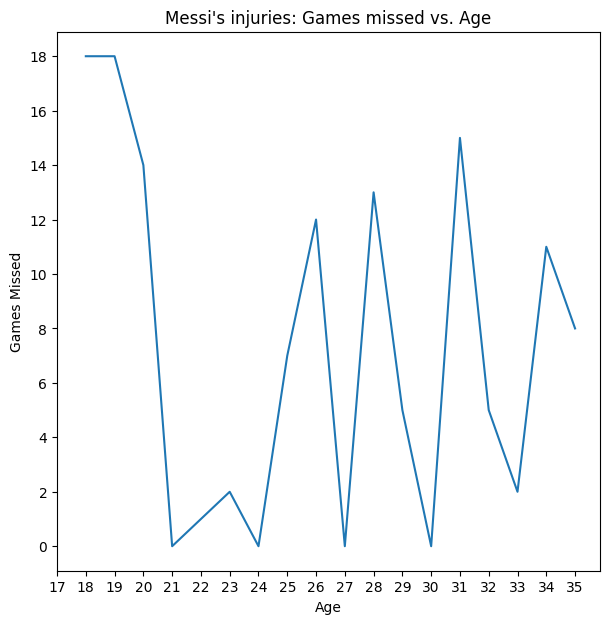

In [23]:
import matplotlib.pyplot as plt
updated_df3.plot(x="age", y=["games_missed"],
        kind="line", figsize=(7, 7))
x_ticks = range(17, 36, 1)
plt.xticks(x_ticks)
y_ticks = range(0, 19, 2)
plt.yticks(y_ticks)

plt.gca().get_legend().remove()
plt.title("Messi's injuries: Games missed vs. Age")
plt.xlabel("Age")
plt.ylabel("Games Missed")
plt.show()

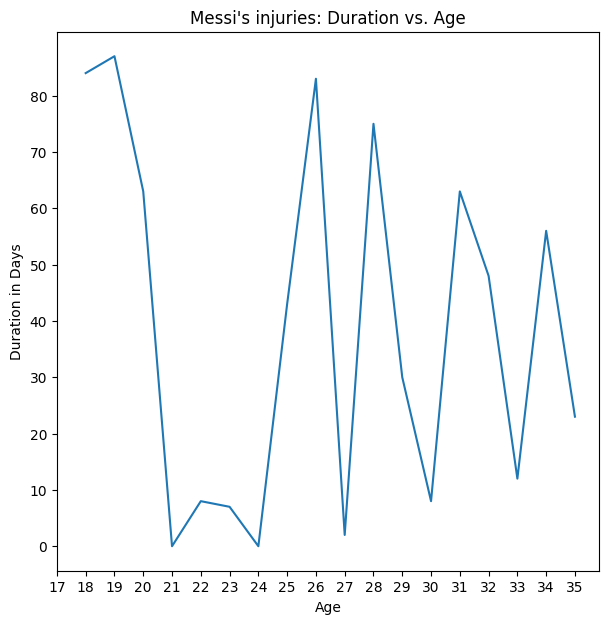

In [21]:
import matplotlib.pyplot as plt
updated_df3.plot(x="age", y=["duration_in_days"],
        kind="line", figsize=(7, 7))
x_ticks = range(17, 36, 1)
plt.xticks(x_ticks)
y_ticks = range(0, 90, 10)
plt.yticks(y_ticks)
plt.gca().get_legend().remove()
plt.title("Messi's injuries: Duration vs. Age")
plt.xlabel("Age")
plt.ylabel("Duration in Days")
plt.show()

We can notice a pattern in Messi injury record. Look at the lowpoints of his injuries in three periods: before the age of 21, between the ages of 21 and 29 and after and including the age of 30. The extent varies, but before the age of 21 and after the age of 29 the lengths of his shortest injuries in those two periods of his career are bigger than the lengths of his shortest injuries between the ages of 21 and 29.